<a href="https://colab.research.google.com/github/Shakira25/MyData/blob/main/WiDS_Datathon_2024_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, Normalizer
from scipy import stats

In [ ]:
train_df = pd.read_csv("training.csv")
train_df

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


In [ ]:
train_df.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [ ]:
len(train_df)

12906

In [ ]:
dict(train_df.isna().any())

{'patient_id': False,
 'patient_race': True,
 'payer_type': True,
 'patient_state': True,
 'patient_zip3': False,
 'patient_age': False,
 'patient_gender': False,
 'bmi': True,
 'breast_cancer_diagnosis_code': False,
 'breast_cancer_diagnosis_desc': False,
 'metastatic_cancer_diagnosis_code': False,
 'metastatic_first_novel_treatment': True,
 'metastatic_first_novel_treatment_type': True,
 'Region': True,
 'Division': True,
 'population': True,
 'density': True,
 'age_median': True,
 'age_under_10': True,
 'age_10_to_19': True,
 'age_20s': True,
 'age_30s': True,
 'age_40s': True,
 'age_50s': True,
 'age_60s': True,
 'age_70s': True,
 'age_over_80': True,
 'male': True,
 'female': True,
 'married': True,
 'divorced': True,
 'never_married': True,
 'widowed': True,
 'family_size': True,
 'family_dual_income': True,
 'income_household_median': True,
 'income_household_under_5': True,
 'income_household_5_to_10': True,
 'income_household_10_to_15': True,
 'income_household_15_to_20': True

In [ ]:
len(train_df) / 2

6453.0

In [ ]:
num_null_values_dict = dict(train_df.isna().sum())
num_null_values_dict = dict(sorted(num_null_values_dict.items(), key=lambda x:x[1], reverse=True))
num_null_values_dict

{'metastatic_first_novel_treatment': 12882,
 'metastatic_first_novel_treatment_type': 12882,
 'bmi': 8965,
 'patient_race': 6385,
 'payer_type': 1803,
 'Region': 52,
 'Division': 52,
 'patient_state': 51,
 'Ozone': 29,
 'PM25': 29,
 'N02': 29,
 'family_size': 4,
 'family_dual_income': 4,
 'income_household_median': 4,
 'income_household_under_5': 4,
 'income_household_5_to_10': 4,
 'income_household_10_to_15': 4,
 'income_household_15_to_20': 4,
 'income_household_20_to_25': 4,
 'income_household_25_to_35': 4,
 'income_household_35_to_50': 4,
 'income_household_50_to_75': 4,
 'income_household_75_to_100': 4,
 'income_household_100_to_150': 4,
 'income_household_150_over': 4,
 'income_household_six_figure': 4,
 'home_ownership': 4,
 'home_value': 4,
 'rent_median': 4,
 'rent_burden': 4,
 'self_employed': 4,
 'farmer': 4,
 'poverty': 4,
 'limited_english': 4,
 'population': 1,
 'density': 1,
 'age_median': 1,
 'age_under_10': 1,
 'age_10_to_19': 1,
 'age_20s': 1,
 'age_30s': 1,
 'age_40s

In [ ]:
train_df.drop(['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'bmi', 'patient_race'], axis=1, inplace=True)
train_df

,patient_id,payer_type,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,MEDICAID,CA,924,84,F,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,COMMERCIAL,CA,928,62,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,COMMERCIAL,TX,760,43,F,C50112,Malignant neoplasm of central portion of left ...,C773,South,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,COMMERCIAL,CA,926,45,F,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,West,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,COMMERCIAL,ID,836,55,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773,West,...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,NaN,OH,436,50,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,Midwest,...,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,452909,COMMERCIAL,CA,945,50,F,C50912,Malignant neoplasm of unspecified site of left...,C773,West,...,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,357486,COMMERCIAL,CA,926,61,F,C50912,Malignant neoplasm of unspecified site of left...,C7931,West,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,935417,NaN,NY,112,37,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773,Northeast,...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


In [ ]:
dict(train_df.dtypes)

{'patient_id': dtype('int64'),
 'payer_type': dtype('O'),
 'patient_state': dtype('O'),
 'patient_zip3': dtype('int64'),
 'patient_age': dtype('int64'),
 'patient_gender': dtype('O'),
 'breast_cancer_diagnosis_code': dtype('O'),
 'breast_cancer_diagnosis_desc': dtype('O'),
 'metastatic_cancer_diagnosis_code': dtype('O'),
 'Region': dtype('O'),
 'Division': dtype('O'),
 'population': dtype('float64'),
 'density': dtype('float64'),
 'age_median': dtype('float64'),
 'age_under_10': dtype('float64'),
 'age_10_to_19': dtype('float64'),
 'age_20s': dtype('float64'),
 'age_30s': dtype('float64'),
 'age_40s': dtype('float64'),
 'age_50s': dtype('float64'),
 'age_60s': dtype('float64'),
 'age_70s': dtype('float64'),
 'age_over_80': dtype('float64'),
 'male': dtype('float64'),
 'female': dtype('float64'),
 'married': dtype('float64'),
 'divorced': dtype('float64'),
 'never_married': dtype('float64'),
 'widowed': dtype('float64'),
 'family_size': dtype('float64'),
 'family_dual_income': dtype('fl

<Axes: xlabel='payer_type', ylabel='Frequency'>

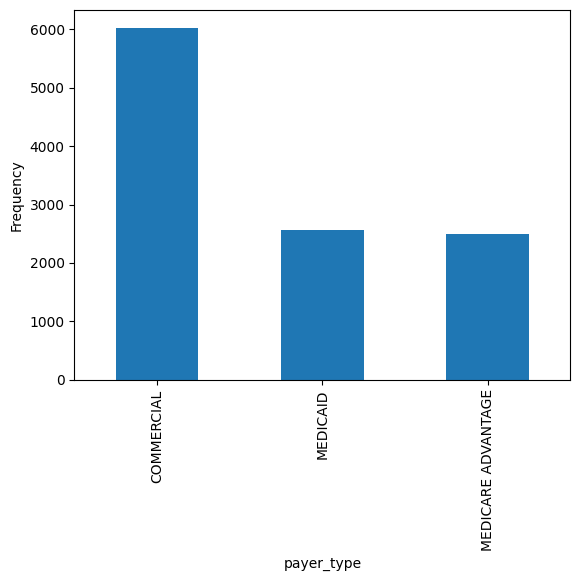

In [ ]:
payer_types = train_df.groupby('payer_type').count()['patient_id']
payer_types.plot(xlabel='payer_type', ylabel='Frequency', kind='bar')
# recommendation: dummy code column and drop payer_type

<Axes: xlabel='patient_state', ylabel='Frequency'>

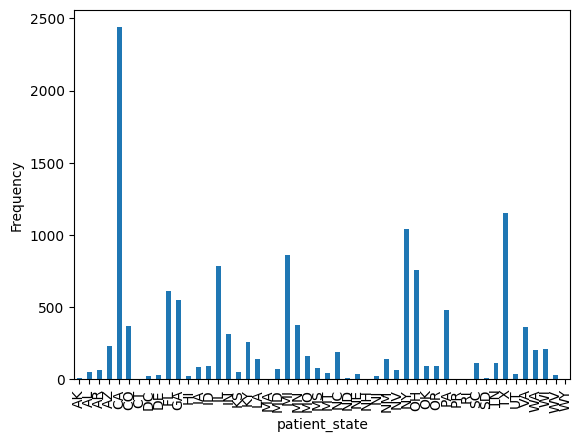

In [ ]:
patient_state = train_df.groupby('patient_state').count()['patient_id']
patient_state.plot(xlabel='patient_state', ylabel='Frequency', kind='bar')
# recommendation: one-hot encode on data

<Axes: xlabel='patient_zip3', ylabel='Frequency'>

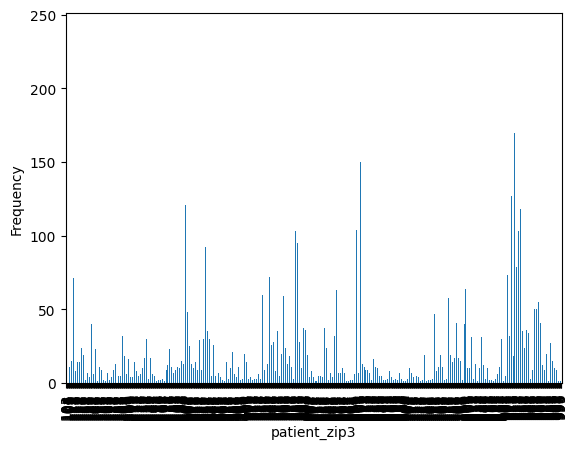

In [ ]:
patient_zip = train_df.groupby('patient_zip3').count()['patient_id']
patient_zip.plot(xlabel='patient_zip3', ylabel='Frequency', kind='bar')
# recommendation: let it be

<Axes: >

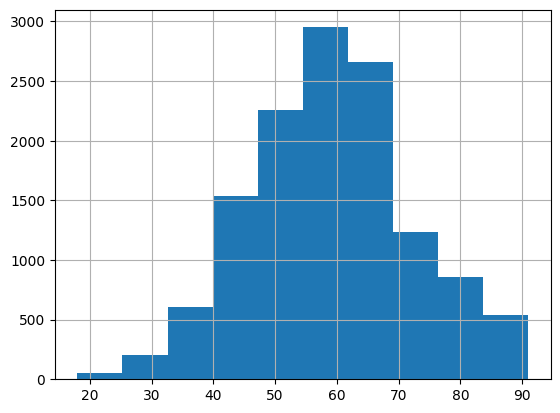

In [ ]:
train_df['patient_age'].hist()
# data could be normalized

<Axes: xlabel='patient_gender', ylabel='Frequency'>

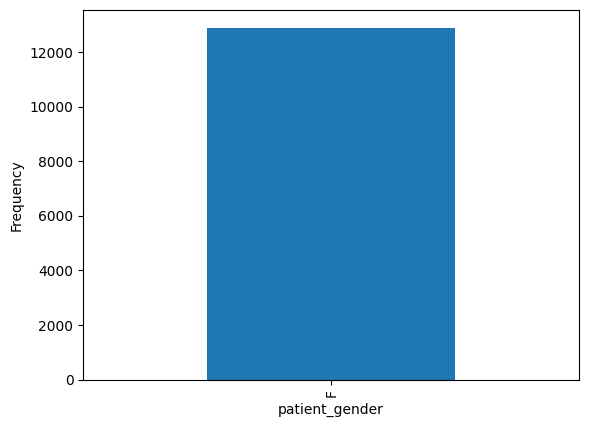

In [ ]:
patient_gender = train_df.groupby('patient_gender').count()['patient_id']
patient_gender.plot(xlabel='patient_gender', ylabel='Frequency', kind='bar')

<Axes: xlabel='Region', ylabel='Frequency'>

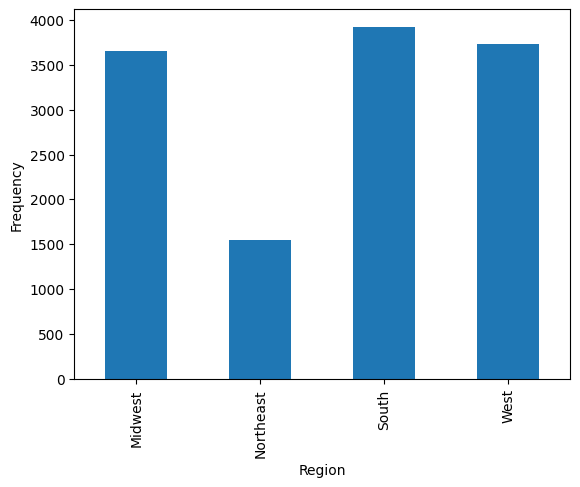

In [ ]:
region = train_df.groupby('Region').count()['patient_id']
region.plot(xlabel='Region', ylabel='Frequency', kind='bar')
# recommendation: dummy encode

<Axes: xlabel='Division', ylabel='Frequency'>

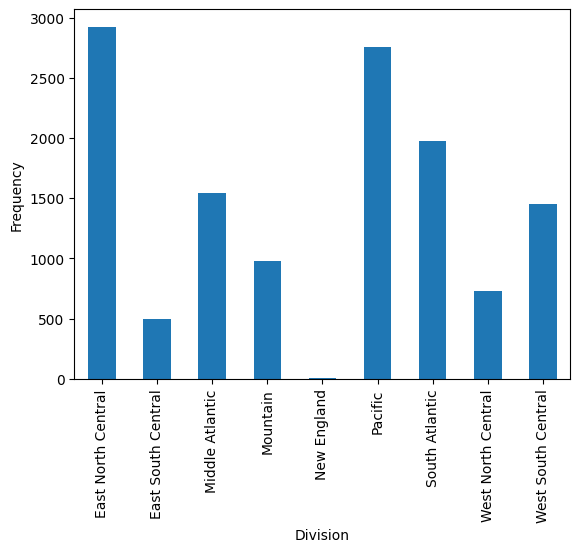

In [ ]:
division = train_df.groupby('Division').count()['patient_id']
division.plot(xlabel='Division', ylabel='Frequency', kind='bar')
# recommendation: one hot encode?

<Axes: xlabel='breast_cancer_diagnosis_code', ylabel='Frequency'>

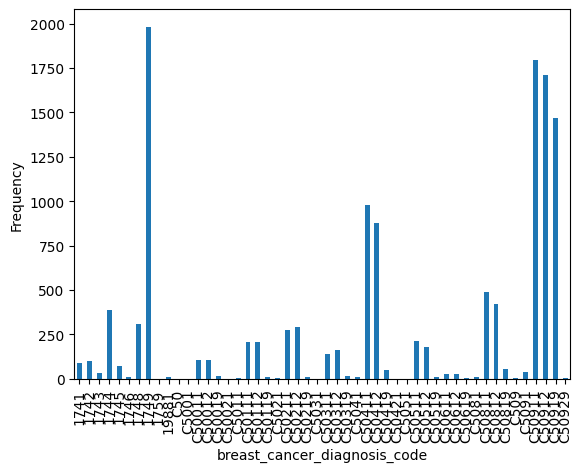

In [ ]:
bc_code = train_df.groupby('breast_cancer_diagnosis_code').count()['patient_id']
bc_code.plot(xlabel='breast_cancer_diagnosis_code', ylabel='Frequency', kind='bar')
# recommendation: one hot encode

<Axes: xlabel='metastatic_cancer_diagnosis_code', ylabel='Frequency'>

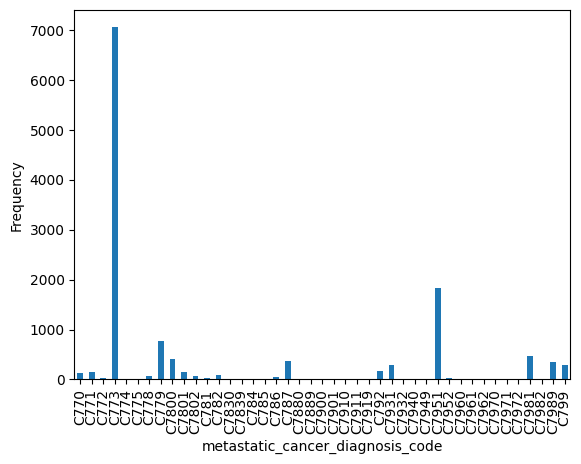

In [ ]:
metastatic_code = train_df.groupby('metastatic_cancer_diagnosis_code').count()['patient_id']
metastatic_code.plot(xlabel='metastatic_cancer_diagnosis_code', ylabel='Frequency', kind='bar')
# recommendation: one hot encode

array([[<Axes: title={'center': 'patient_age'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'age_median'}>],
       [<Axes: title={'center': 'age_under_10'}>,
        <Axes: title={'center': 'age_10_to_19'}>,
        <Axes: title={'center': 'age_20s'}>,
        <Axes: title={'center': 'age_30s'}>],
       [<Axes: title={'center': 'age_40s'}>,
        <Axes: title={'center': 'age_50s'}>,
        <Axes: title={'center': 'age_60s'}>,
        <Axes: title={'center': 'age_70s'}>],
       [<Axes: title={'center': 'age_over_80'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

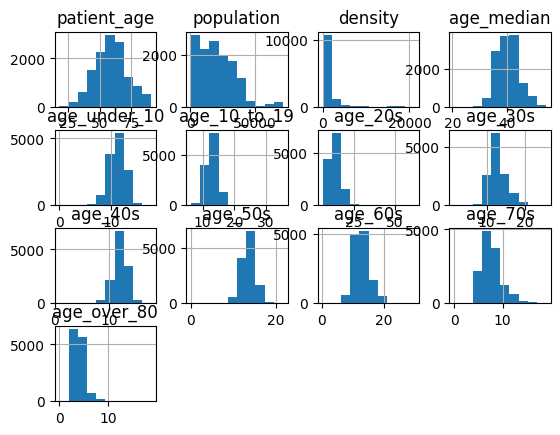

In [ ]:
train_df.hist(column=['patient_age',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80'])

<Axes: >

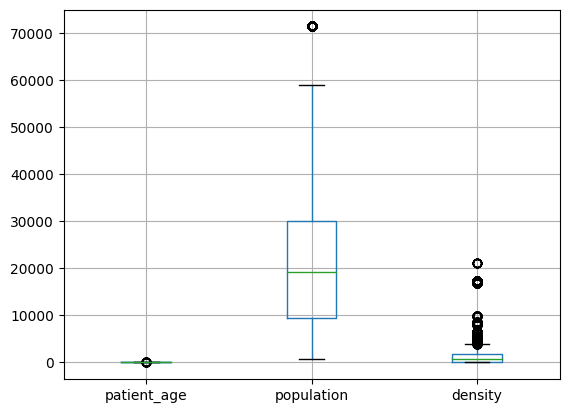

In [ ]:
train_df.boxplot(column=['patient_age',
 'population',
 'density'])

<Axes: >

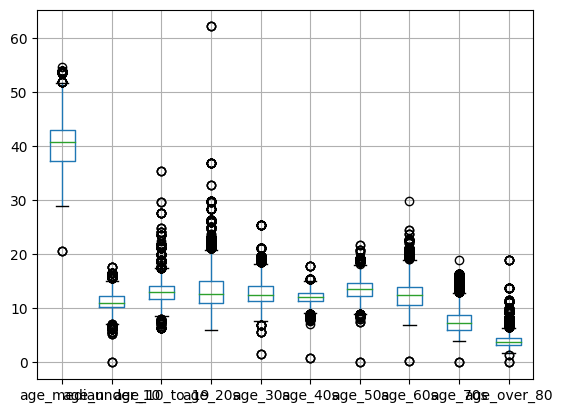

In [ ]:
train_df.boxplot(column=[
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80'])

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'female'}>,
        <Axes: title={'center': 'married'}>],
       [<Axes: title={'center': 'divorced'}>,
        <Axes: title={'center': 'never_married'}>,
        <Axes: title={'center': 'widowed'}>],
       [<Axes: title={'center': 'family_size'}>,
        <Axes: title={'center': 'family_dual_income'}>, <Axes: >]],
      dtype=object)

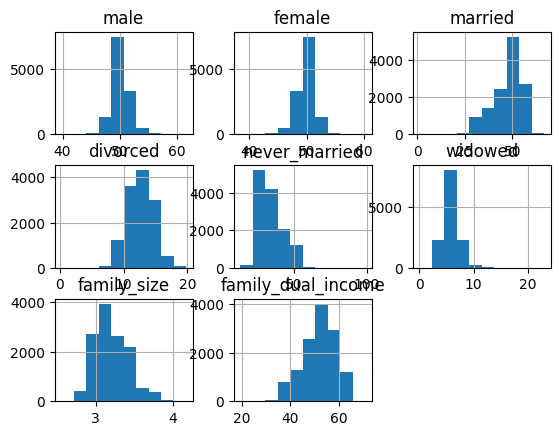

In [ ]:
train_df.hist(column=[
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income'])

<Axes: >

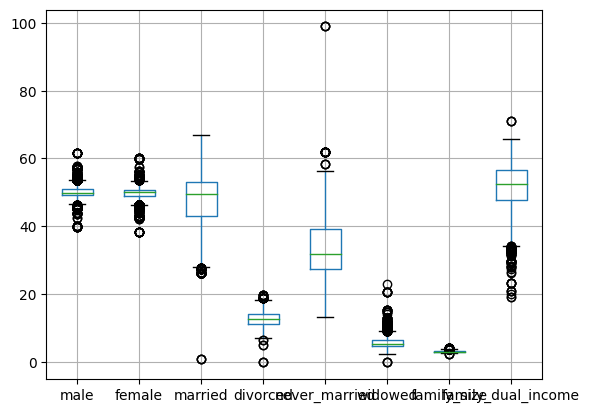

In [ ]:
train_df.boxplot(column=[
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income'])

array([[<Axes: title={'center': 'income_household_median'}>,
        <Axes: title={'center': 'income_household_under_5'}>,
        <Axes: title={'center': 'income_household_5_to_10'}>,
        <Axes: title={'center': 'income_household_10_to_15'}>],
       [<Axes: title={'center': 'income_household_15_to_20'}>,
        <Axes: title={'center': 'income_household_20_to_25'}>,
        <Axes: title={'center': 'income_household_25_to_35'}>,
        <Axes: title={'center': 'income_household_35_to_50'}>],
       [<Axes: title={'center': 'income_household_50_to_75'}>,
        <Axes: title={'center': 'income_household_75_to_100'}>,
        <Axes: title={'center': 'income_household_100_to_150'}>,
        <Axes: title={'center': 'income_household_150_over'}>],
       [<Axes: title={'center': 'income_household_six_figure'}>,
        <Axes: title={'center': 'income_individual_median'}>, <Axes: >,
        <Axes: >]], dtype=object)

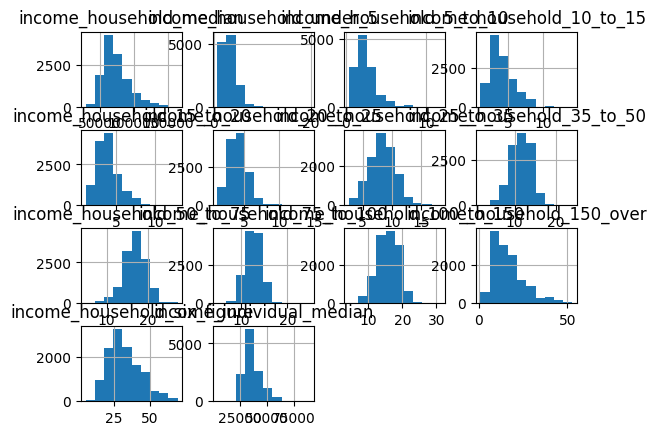

In [ ]:
train_df.hist(column=[
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median'])

<Axes: >

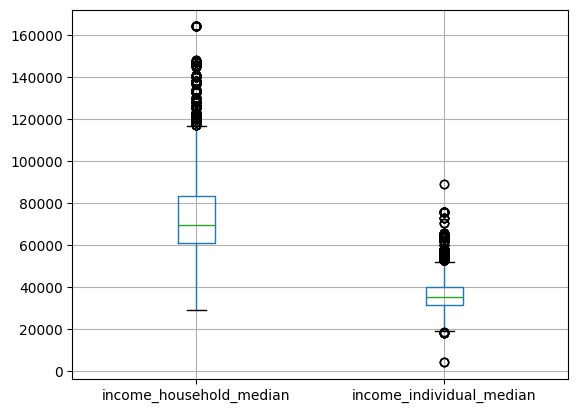

In [ ]:
train_df.boxplot(column=['income_household_median', 'income_individual_median'])

<Axes: >

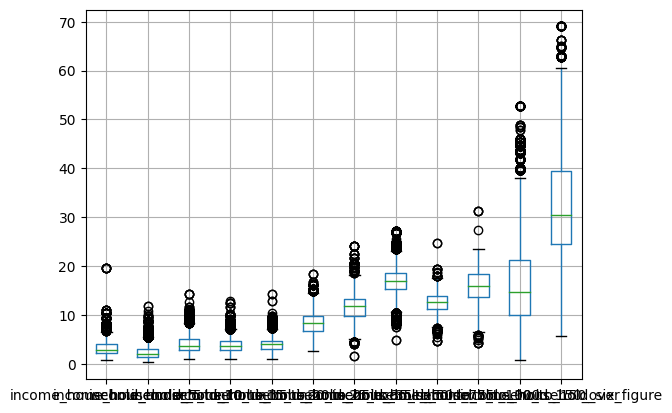

In [ ]:
train_df.boxplot(column=[
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure'])

array([[<Axes: title={'center': 'home_ownership'}>,
        <Axes: title={'center': 'housing_units'}>],
       [<Axes: title={'center': 'home_value'}>,
        <Axes: title={'center': 'rent_median'}>],
       [<Axes: title={'center': 'rent_burden'}>, <Axes: >]], dtype=object)

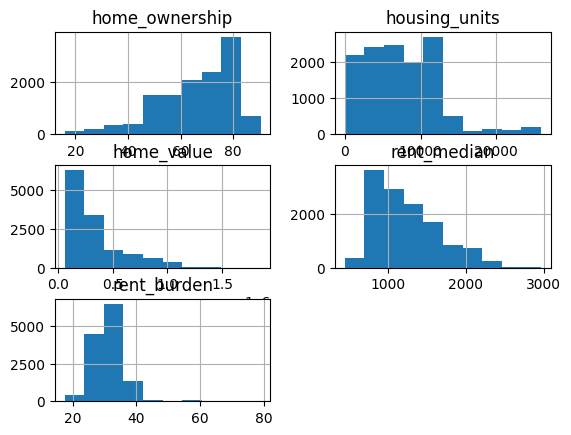

In [ ]:
train_df.hist(column=[
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden'])
# normalize housing_units
# normalize home_value

<Axes: >

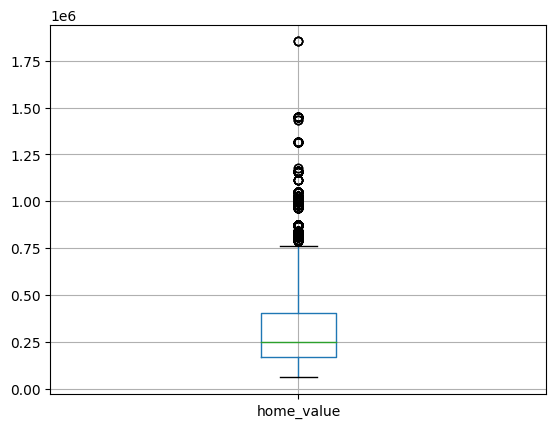

In [ ]:
train_df.boxplot(column=['home_value'])

<Axes: >

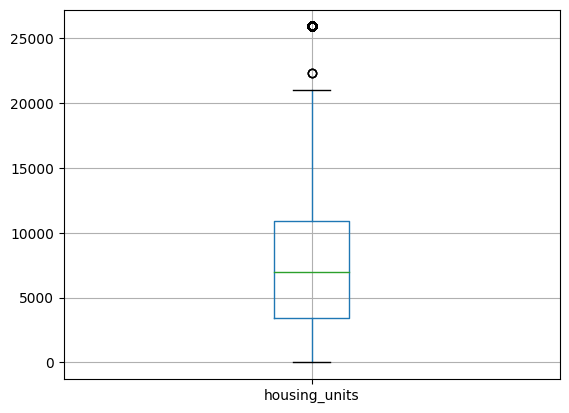

In [ ]:
train_df.boxplot(column=['housing_units'])

<Axes: >

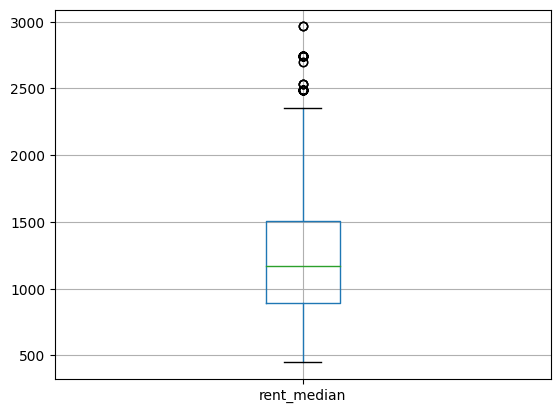

In [ ]:
train_df.boxplot(column=['rent_median'])

<Axes: >

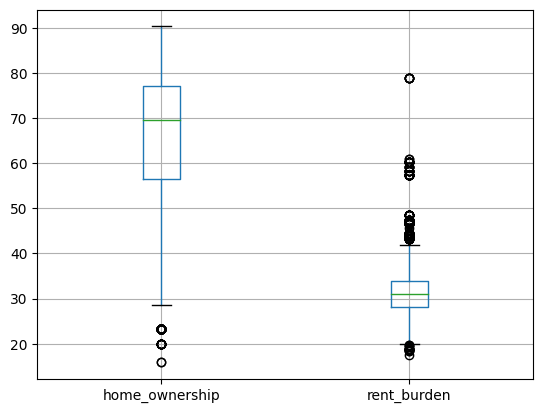

In [ ]:
train_df.boxplot(column=[
 'home_ownership',
 'rent_burden'])

array([[<Axes: title={'center': 'education_less_highschool'}>,
        <Axes: title={'center': 'education_highschool'}>,
        <Axes: title={'center': 'education_some_college'}>],
       [<Axes: title={'center': 'education_bachelors'}>,
        <Axes: title={'center': 'education_graduate'}>,
        <Axes: title={'center': 'education_college_or_above'}>],
       [<Axes: title={'center': 'education_stem_degree'}>,
        <Axes: title={'center': 'labor_force_participation'}>,
        <Axes: title={'center': 'unemployment_rate'}>],
       [<Axes: title={'center': 'self_employed'}>,
        <Axes: title={'center': 'farmer'}>, <Axes: >]], dtype=object)

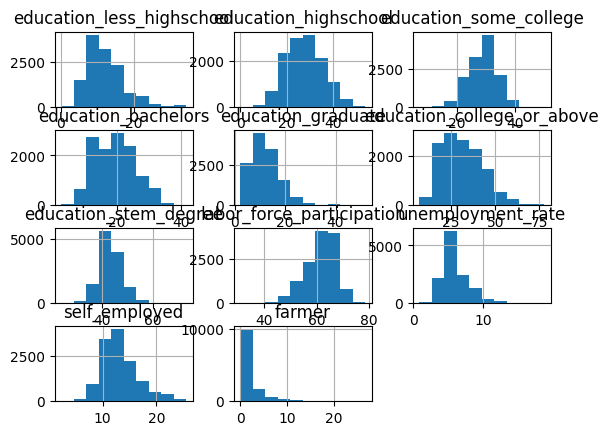

In [ ]:
train_df.hist(column=[
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_force_participation',
 'unemployment_rate',
 'self_employed',
 'farmer'])

<Axes: >

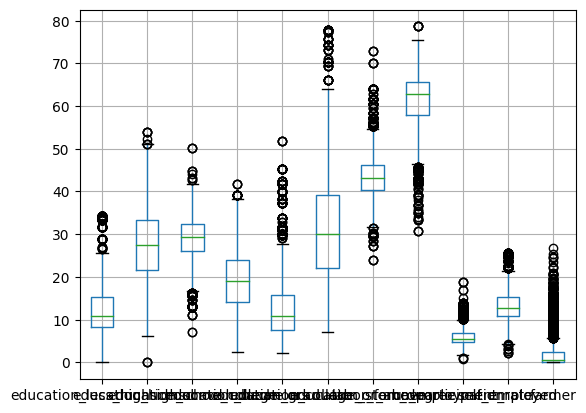

In [ ]:
train_df.boxplot(column=[
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_force_participation',
 'unemployment_rate',
 'self_employed',
 'farmer'])

array([[<Axes: title={'center': 'race_white'}>,
        <Axes: title={'center': 'race_black'}>,
        <Axes: title={'center': 'race_asian'}>],
       [<Axes: title={'center': 'race_native'}>,
        <Axes: title={'center': 'race_pacific'}>,
        <Axes: title={'center': 'race_other'}>],
       [<Axes: title={'center': 'race_multiple'}>,
        <Axes: title={'center': 'hispanic'}>, <Axes: >]], dtype=object)

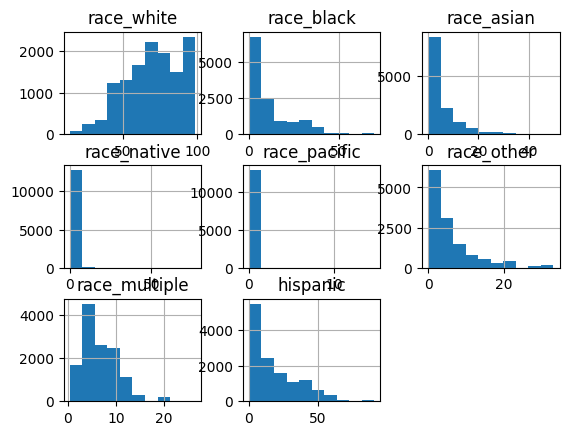

In [ ]:
train_df.hist(column=[
 'race_white',
 'race_black',
 'race_asian',
 'race_native',
 'race_pacific',
 'race_other',
 'race_multiple',
 'hispanic'])

<Axes: >

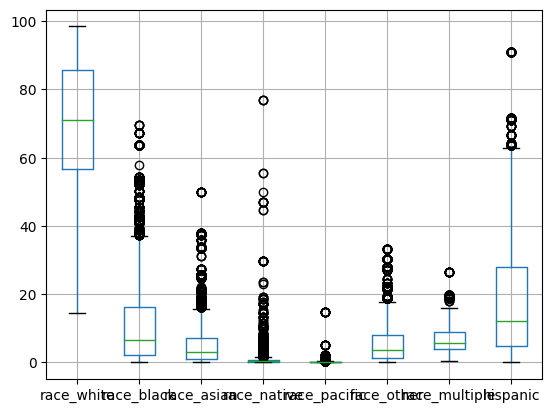

In [ ]:
train_df.boxplot(column=[
 'race_white',
 'race_black',
 'race_asian',
 'race_native',
 'race_pacific',
 'race_other',
 'race_multiple',
 'hispanic'])

array([[<Axes: title={'center': 'disabled'}>,
        <Axes: title={'center': 'poverty'}>,
        <Axes: title={'center': 'limited_english'}>],
       [<Axes: title={'center': 'commute_time'}>,
        <Axes: title={'center': 'health_uninsured'}>,
        <Axes: title={'center': 'veteran'}>],
       [<Axes: title={'center': 'Ozone'}>,
        <Axes: title={'center': 'PM25'}>,
        <Axes: title={'center': 'N02'}>]], dtype=object)

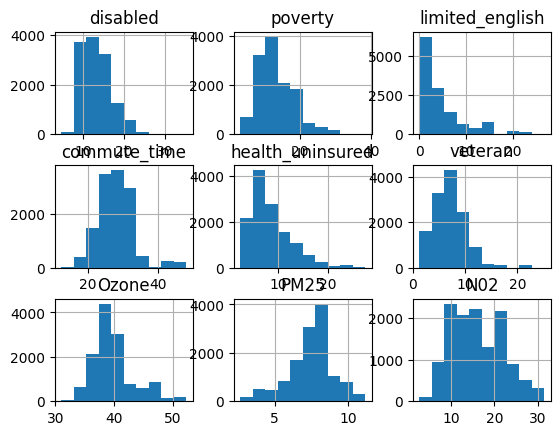

In [ ]:
train_df.hist(column=[
 'disabled',
 'poverty',
 'limited_english',
 'commute_time',
 'health_uninsured',
 'veteran',
 'Ozone',
 'PM25',
 'N02'])

<Axes: >

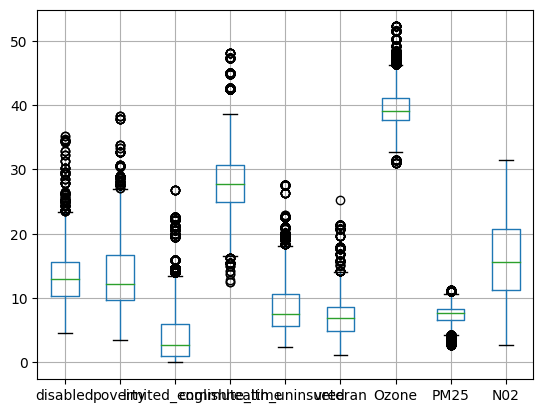

In [ ]:
train_df.boxplot(column=[
 'disabled',
 'poverty',
 'limited_english',
 'commute_time',
 'health_uninsured',
 'veteran',
 'Ozone',
 'PM25',
 'N02'])

In [ ]:
numeric_columns = ['patient_age',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_force_participation',
 'unemployment_rate',
 'self_employed',
 'farmer',
 'race_white',
 'race_black',
 'race_asian',
 'race_native',
 'race_pacific',
 'race_other',
 'race_multiple',
 'hispanic',
 'disabled',
 'poverty',
 'limited_english',
 'commute_time',
 'health_uninsured',
 'veteran',
 'Ozone',
 'PM25',
 'N02']
p_value_col_dict = {}
for col in numeric_columns:
  values = train_df[col].dropna()
  res = stats.normaltest(values)
  p_value = res.pvalue
  p_value_col_dict[col] = p_value
p_value_col_dict

{'patient_age': 7.206287457475626e-10,
 'population': 0.0,
 'density': 0.0,
 'age_median': 6.644262469712109e-42,
 'age_under_10': 3.85547867492785e-67,
 'age_10_to_19': 0.0,
 'age_20s': 0.0,
 'age_30s': 0.0,
 'age_40s': 2.0390173916954513e-154,
 'age_50s': 9.061734020052603e-88,
 'age_60s': 1.0491153932242289e-212,
 'age_70s': 0.0,
 'age_over_80': 0.0,
 'male': 0.0,
 'female': 0.0,
 'married': 2.614706267659532e-224,
 'divorced': 0.00016543821369846199,
 'never_married': 5.338979800813482e-291,
 'widowed': 0.0,
 'family_size': 1.8807836573255295e-245,
 'family_dual_income': 2.0995824925423033e-109,
 'income_household_median': 0.0,
 'income_household_under_5': 0.0,
 'income_household_5_to_10': 0.0,
 'income_household_10_to_15': 0.0,
 'income_household_15_to_20': 0.0,
 'income_household_20_to_25': 5.326411473338216e-283,
 'income_household_25_to_35': 9.84314770714396e-11,
 'income_household_35_to_50': 3.3891724728915684e-18,
 'income_household_50_to_75': 4.892980122194496e-62,
 'income_

In [ ]:
normalize_scaler = {}
for col in numeric_columns:
  scaler = Normalizer()
  train_df[col] = scaler.fit_transform(np.array(train_df[col]).reshape(-1,1))
  normalize_scaler[col] = scaler
train_df

ValueError: Input X contains NaN.
Normalizer does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
train_df.drop(['patient_id', 'patient_gender', 'breast_cancer_diagnosis_desc'], axis=1, inplace=True)
train_df

,payer_type,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,MEDICAID,CA,924,84,C50919,C7989,West,Pacific,31437.75000,1189.562500,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,COMMERCIAL,CA,928,62,C50411,C773,West,Pacific,39121.87879,2295.939394,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,COMMERCIAL,TX,760,43,C50112,C773,South,West South Central,21996.68333,626.236667,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,COMMERCIAL,CA,926,45,C50212,C773,West,Pacific,32795.32558,1896.220930,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,COMMERCIAL,ID,836,55,1749,C773,West,Mountain,10886.26000,116.886000,...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,NaN,OH,436,50,C50411,C773,Midwest,East North Central,19413.05882,1196.805882,...,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,COMMERCIAL,CA,945,50,C50912,C773,West,Pacific,30153.87952,976.289157,...,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,COMMERCIAL,CA,926,61,C50912,C7931,West,Pacific,32795.32558,1896.220930,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,NaN,NY,112,37,1749,C773,Northeast,Middle Atlantic,71374.13158,17326.407890,...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


In [ ]:
payer_types_dummies = pd.get_dummies(train_df['payer_type'])
payer_types_dummies

,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
12901,0,0,0
12902,1,0,0
12903,1,0,0
12904,0,0,0


In [ ]:
train_df['COMMERCIAL'] = payer_types_dummies['COMMERCIAL']
train_df['MEDICAID'] = payer_types_dummies['MEDICAID']
train_df['MEDICARE ADVANTAGE'] = payer_types_dummies['MEDICARE ADVANTAGE']
train_df.drop(['payer_type'], axis=1, inplace=True)
train_df

,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,...,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE
0,CA,924,84,C50919,C7989,West,Pacific,31437.75000,1189.562500,30.642857,...,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,0,1,0
1,CA,928,62,C50411,C773,West,Pacific,39121.87879,2295.939394,38.200000,...,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,1,0,0
2,TX,760,43,C50112,C773,South,West South Central,21996.68333,626.236667,37.906667,...,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,1,0,0
3,CA,926,45,C50212,C773,West,Pacific,32795.32558,1896.220930,42.871429,...,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,1,0,0
4,ID,836,55,1749,C773,West,Mountain,10886.26000,116.886000,43.473469,...,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,OH,436,50,C50411,C773,Midwest,East North Central,19413.05882,1196.805882,36.911765,...,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1,0,0,0
12902,CA,945,50,C50912,C773,West,Pacific,30153.87952,976.289157,42.135802,...,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1,1,0,0
12903,CA,926,61,C50912,C7931,West,Pacific,32795.32558,1896.220930,42.871429,...,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1,1,0,0
12904,NY,112,37,1749,C773,Northeast,Middle Atlantic,71374.13158,17326.407890,36.476316,...,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0,0,0,0


In [ ]:
region_dummies = pd.get_dummies(train_df['Region'])
region_dummies

,Midwest,Northeast,South,West
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
12901,1,0,0,0
12902,0,0,0,1
12903,0,0,0,1
12904,0,1,0,0


In [ ]:
train_df['Midwest'] = region_dummies['Midwest']
train_df['Northeast'] = region_dummies['Northeast']
train_df['South'] = region_dummies['South']
train_df['West'] = region_dummies['West']
train_df.drop(['Region'], axis=1, inplace=True)
train_df

,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Division,population,density,age_median,age_under_10,...,PM25,N02,DiagPeriodL90D,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,Midwest,Northeast,South,West
0,CA,924,84,C50919,C7989,Pacific,31437.75000,1189.562500,30.642857,16.014286,...,8.650555,18.606528,1,0,1,0,0,0,0,1
1,CA,928,62,C50411,C773,Pacific,39121.87879,2295.939394,38.200000,11.878788,...,8.487175,20.113179,1,1,0,0,0,0,0,1
2,TX,760,43,C50112,C773,West South Central,21996.68333,626.236667,37.906667,13.028333,...,7.642753,14.839351,1,1,0,0,0,0,1,0
3,CA,926,45,C50212,C773,Pacific,32795.32558,1896.220930,42.871429,10.071429,...,7.229393,15.894123,0,1,0,0,0,0,0,1
4,ID,836,55,1749,C773,Mountain,10886.26000,116.886000,43.473469,10.824000,...,4.110749,11.722197,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,OH,436,50,C50411,C773,East North Central,19413.05882,1196.805882,36.911765,12.876471,...,8.068682,21.140731,1,0,0,0,1,0,0,0
12902,CA,945,50,C50912,C773,Pacific,30153.87952,976.289157,42.135802,10.753086,...,6.265266,10.728732,1,1,0,0,0,0,0,1
12903,CA,926,61,C50912,C7931,Pacific,32795.32558,1896.220930,42.871429,10.071429,...,7.229393,15.894123,1,1,0,0,0,0,0,1
12904,NY,112,37,1749,C773,Middle Atlantic,71374.13158,17326.407890,36.476316,12.986842,...,7.879795,27.496367,0,0,0,0,0,1,0,0


In [ ]:
encoder_state = LabelEncoder()
train_df['patient_state'] = encoder_state.fit_transform(np.array(train_df['patient_state']).reshape(-1,1))
train_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Division,population,density,age_median,age_under_10,...,PM25,N02,DiagPeriodL90D,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,Midwest,Northeast,South,West
0,4,924,84,C50919,C7989,Pacific,31437.75000,1189.562500,30.642857,16.014286,...,8.650555,18.606528,1,0,1,0,0,0,0,1
1,4,928,62,C50411,C773,Pacific,39121.87879,2295.939394,38.200000,11.878788,...,8.487175,20.113179,1,1,0,0,0,0,0,1
2,43,760,43,C50112,C773,West South Central,21996.68333,626.236667,37.906667,13.028333,...,7.642753,14.839351,1,1,0,0,0,0,1,0
3,4,926,45,C50212,C773,Pacific,32795.32558,1896.220930,42.871429,10.071429,...,7.229393,15.894123,0,1,0,0,0,0,0,1
4,13,836,55,1749,C773,Mountain,10886.26000,116.886000,43.473469,10.824000,...,4.110749,11.722197,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,34,436,50,C50411,C773,East North Central,19413.05882,1196.805882,36.911765,12.876471,...,8.068682,21.140731,1,0,0,0,1,0,0,0
12902,4,945,50,C50912,C773,Pacific,30153.87952,976.289157,42.135802,10.753086,...,6.265266,10.728732,1,1,0,0,0,0,0,1
12903,4,926,61,C50912,C7931,Pacific,32795.32558,1896.220930,42.871429,10.071429,...,7.229393,15.894123,1,1,0,0,0,0,0,1
12904,33,112,37,1749,C773,Middle Atlantic,71374.13158,17326.407890,36.476316,12.986842,...,7.879795,27.496367,0,0,0,0,0,1,0,0


In [ ]:
encoder_division = LabelEncoder()
train_df['Division'] = encoder_division.fit_transform(np.array(train_df['Division']).reshape(-1,1))
train_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Division,population,density,age_median,age_under_10,...,PM25,N02,DiagPeriodL90D,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,Midwest,Northeast,South,West
0,4,924,84,C50919,C7989,5,31437.75000,1189.562500,30.642857,16.014286,...,8.650555,18.606528,1,0,1,0,0,0,0,1
1,4,928,62,C50411,C773,5,39121.87879,2295.939394,38.200000,11.878788,...,8.487175,20.113179,1,1,0,0,0,0,0,1
2,43,760,43,C50112,C773,8,21996.68333,626.236667,37.906667,13.028333,...,7.642753,14.839351,1,1,0,0,0,0,1,0
3,4,926,45,C50212,C773,5,32795.32558,1896.220930,42.871429,10.071429,...,7.229393,15.894123,0,1,0,0,0,0,0,1
4,13,836,55,1749,C773,3,10886.26000,116.886000,43.473469,10.824000,...,4.110749,11.722197,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,34,436,50,C50411,C773,0,19413.05882,1196.805882,36.911765,12.876471,...,8.068682,21.140731,1,0,0,0,1,0,0,0
12902,4,945,50,C50912,C773,5,30153.87952,976.289157,42.135802,10.753086,...,6.265266,10.728732,1,1,0,0,0,0,0,1
12903,4,926,61,C50912,C7931,5,32795.32558,1896.220930,42.871429,10.071429,...,7.229393,15.894123,1,1,0,0,0,0,0,1
12904,33,112,37,1749,C773,2,71374.13158,17326.407890,36.476316,12.986842,...,7.879795,27.496367,0,0,0,0,0,1,0,0


In [ ]:
# As experiment lol
clean_train_df = train_df.dropna()
clean_train_df

,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Division,population,density,age_median,age_under_10,...,PM25,N02,DiagPeriodL90D,COMMERCIAL,MEDICAID,MEDICARE ADVANTAGE,Midwest,Northeast,South,West
0,4,924,84,C50919,C7989,5,31437.75000,1189.562500,30.642857,16.014286,...,8.650555,18.606528,1,0,1,0,0,0,0,1
1,4,928,62,C50411,C773,5,39121.87879,2295.939394,38.200000,11.878788,...,8.487175,20.113179,1,1,0,0,0,0,0,1
2,43,760,43,C50112,C773,8,21996.68333,626.236667,37.906667,13.028333,...,7.642753,14.839351,1,1,0,0,0,0,1,0
3,4,926,45,C50212,C773,5,32795.32558,1896.220930,42.871429,10.071429,...,7.229393,15.894123,0,1,0,0,0,0,0,1
4,13,836,55,1749,C773,3,10886.26000,116.886000,43.473469,10.824000,...,4.110749,11.722197,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,34,436,50,C50411,C773,0,19413.05882,1196.805882,36.911765,12.876471,...,8.068682,21.140731,1,0,0,0,1,0,0,0
12902,4,945,50,C50912,C773,5,30153.87952,976.289157,42.135802,10.753086,...,6.265266,10.728732,1,1,0,0,0,0,0,1
12903,4,926,61,C50912,C7931,5,32795.32558,1896.220930,42.871429,10.071429,...,7.229393,15.894123,1,1,0,0,0,0,0,1
12904,33,112,37,1749,C773,2,71374.13158,17326.407890,36.476316,12.986842,...,7.879795,27.496367,0,0,0,0,0,1,0,0


In [ ]:
test_df = pd.read_csv("test.csv")
test_df

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.00,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,977076,White,NaN,KY,404,63,F,29.60,C50411,Malig neoplm of upper-outer quadrant of right ...,...,1.243478,20.404348,20.813636,0.350000,30.152174,6.473913,5.908696,39.947326,7.622672,9.154618
5788,922960,White,NaN,IA,507,69,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,6.175000,16.675000,15.900000,2.800000,16.800000,5.475000,6.875000,35.825340,7.610534,9.712786
5789,759690,NaN,MEDICARE ADVANTAGE,WA,980,84,F,28.28,C50411,Malig neoplm of upper-outer quadrant of right ...,...,9.511321,9.752830,6.432075,5.094340,31.275472,5.309434,5.807547,36.618644,4.939852,23.393650
5790,911717,NaN,COMMERCIAL,OK,740,58,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,4.374627,15.544776,16.603030,0.513636,25.877273,14.926866,7.600000,39.832235,8.030925,9.769358


In [ ]:
test_df.drop(['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'bmi', 'patient_race'], axis=1, inplace=True)
test_df

,patient_id,payer_type,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,MEDICAID,IN,467,54,F,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,Midwest,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,COMMERCIAL,FL,337,52,F,C50912,Malignant neoplasm of unspecified site of left...,C787,South,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,MEDICAID,CA,917,61,F,C50911,Malignant neoplasm of unsp site of right femal...,C773,West,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,MEDICARE ADVANTAGE,CA,917,64,F,C50912,Malignant neoplasm of unspecified site of left...,C779,West,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,NaN,CA,900,40,F,C50412,Malig neoplasm of upper-outer quadrant of left...,C779,West,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,977076,NaN,KY,404,63,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,South,...,1.243478,20.404348,20.813636,0.350000,30.152174,6.473913,5.908696,39.947326,7.622672,9.154618
5788,922960,NaN,IA,507,69,F,C50912,Malignant neoplasm of unspecified site of left...,C773,Midwest,...,6.175000,16.675000,15.900000,2.800000,16.800000,5.475000,6.875000,35.825340,7.610534,9.712786
5789,759690,MEDICARE ADVANTAGE,WA,980,84,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,...,9.511321,9.752830,6.432075,5.094340,31.275472,5.309434,5.807547,36.618644,4.939852,23.393650
5790,911717,COMMERCIAL,OK,740,58,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773,South,...,4.374627,15.544776,16.603030,0.513636,25.877273,14.926866,7.600000,39.832235,8.030925,9.769358


In [ ]:
test_df.drop(['patient_id', 'patient_gender', 'breast_cancer_diagnosis_desc'], axis=1, inplace=True)
test_df

,payer_type,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,Region,Division,population,density,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,MEDICAID,IN,467,54,C50412,C773,Midwest,East North Central,5441.435484,85.620968,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,COMMERCIAL,FL,337,52,C50912,C787,South,South Atlantic,19613.820510,1555.107692,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,MEDICAID,CA,917,61,C50911,C773,West,Pacific,43030.500000,2048.578261,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,MEDICARE ADVANTAGE,CA,917,64,C50912,C779,West,Pacific,43030.500000,2048.578261,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,NaN,CA,900,40,C50412,C779,West,Pacific,36054.117650,5294.330882,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,NaN,KY,404,63,C50411,C773,South,East South Central,7765.000000,131.040000,...,1.243478,20.404348,20.813636,0.350000,30.152174,6.473913,5.908696,39.947326,7.622672,9.154618
5788,NaN,IA,507,69,C50912,C773,Midwest,West North Central,19332.750000,346.250000,...,6.175000,16.675000,15.900000,2.800000,16.800000,5.475000,6.875000,35.825340,7.610534,9.712786
5789,MEDICARE ADVANTAGE,WA,980,84,C50411,C773,West,Pacific,28628.290910,1091.825455,...,9.511321,9.752830,6.432075,5.094340,31.275472,5.309434,5.807547,36.618644,4.939852,23.393650
5790,COMMERCIAL,OK,740,58,1749,C773,South,West South Central,9716.970149,150.602985,...,4.374627,15.544776,16.603030,0.513636,25.877273,14.926866,7.600000,39.832235,8.030925,9.769358


In [ ]:
payer_types_dummies = pd.get_dummies(test_df['payer_type'])
payer_types_dummies

In [ ]:
test_df['COMMERCIAL'] = payer_types_dummies['COMMERCIAL']
test_df['MEDICAID'] = payer_types_dummies['MEDICAID']
test_df['MEDICARE ADVANTAGE'] = payer_types_dummies['MEDICARE ADVANTAGE']
test_df.drop(['payer_type'], axis=1, inplace=True)
test_df

In [ ]:
region_dummies = pd.get_dummies(test_df['Region'])
region_dummies

In [ ]:
test_df['Midwest'] = region_dummies['Midwest']
test_df['Northeast'] = region_dummies['Northeast']
test_df['South'] = region_dummies['South']
test_df['West'] = region_dummies['West']
test_df.drop(['Region'], axis=1, inplace=True)
test_df

In [ ]:
test_df['patient_state'] = encoder_state.fit_transform(np.array(test_df['patient_state']).reshape(-1,1))
test_df

In [ ]:
test_df['Division'] = encoder_division.fit_transform(np.array(test_df['Division']).reshape(-1,1))
test_df